In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
figure_folder = 'figures/'

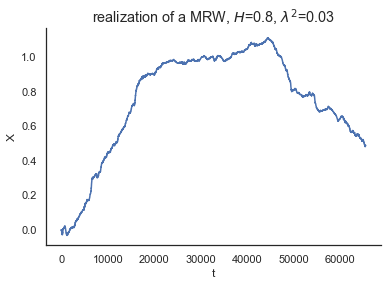

In [4]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=65536, H=0.8, lam=np.sqrt(0.03), L=65536)

plt.plot(X)
plt.title(r'realization of a MRW, $H$=0.8, $\lambda^2$=0.03', size='large')
plt.ylabel('X')
plt.xlabel('t')
sns.despine()
plt.show()

In [5]:
from pymultifracs.wavelet import wavelet_analysis

In [6]:
WT = wavelet_analysis(X, p_exp=2, j1=2, j2=12, weighted=True)

In [7]:
coef_boot = WT.wt_coefs.bootstrap(100, 'db3')

In [8]:
coef_boot.j2_eff()

12

In [9]:
leader_boot = WT.wt_leaders.bootstrap(100, 'db3')

In [10]:
from pymultifracs.mfa import mf_analysis, minimal_mf_analysis

In [11]:
from pymultifracs.utils import build_q_log

In [12]:
dwt, lwt = minimal_mf_analysis(WT.wt_coefs, WT.wt_leaders, scaling_ranges=[(3, coef_boot.j2_eff())], weighted='bootstrap', q=None, n_cumul=3, bootstrap_weighted='bootstrap')

In [26]:
dwt, lwt = minimal_mf_analysis(WT.wt_coefs, WT.wt_leaders, scaling_ranges=[(3, coef_boot.j2_eff())], weighted='bootstrap', q=None, n_cumul=3, bootstrap_weighted=None)

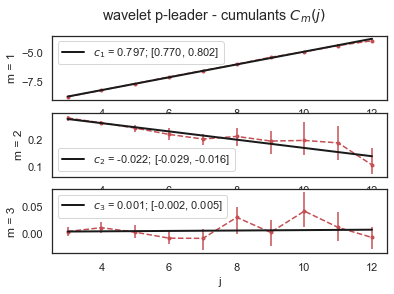

In [27]:
lwt.cumulants.plot()

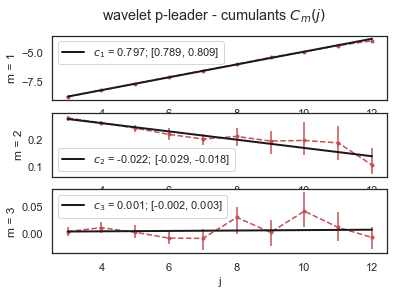

In [19]:
lwt.cumulants.plot()

In [13]:
q = build_q_log(.1, 5, 3)

In [14]:
dwt_b, lwt_b = mf_analysis(coef_boot, leader_boot, j1=2, weighted=True, q=q, n_cumul=3)
dwt, lwt = mf_analysis(WT.wt_coefs, WT.wt_leaders, j1=2, weighted=True, q=q, n_cumul=3)

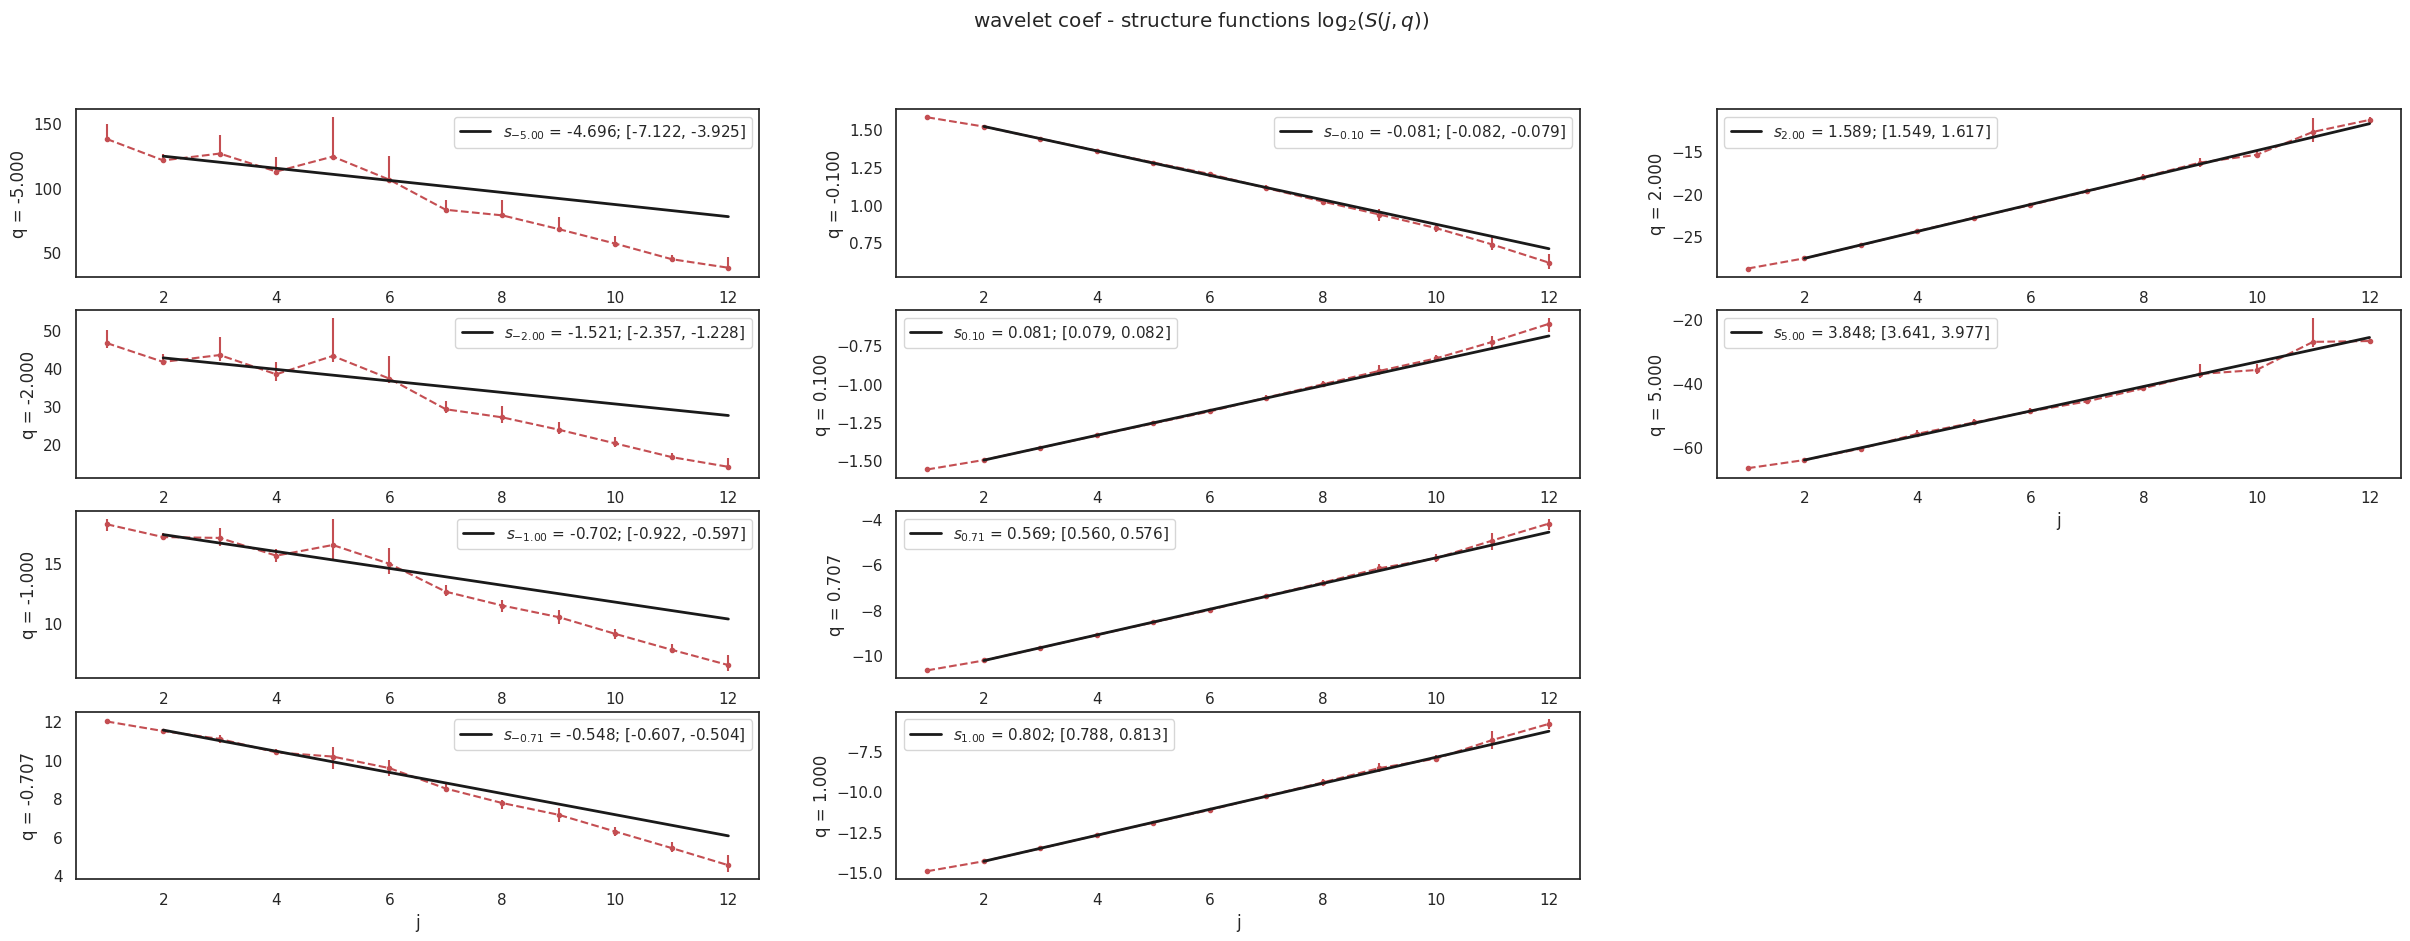

In [18]:
dwt.structure.plot(struct_boot=dwt_b.structure, figsize=(30, 10))

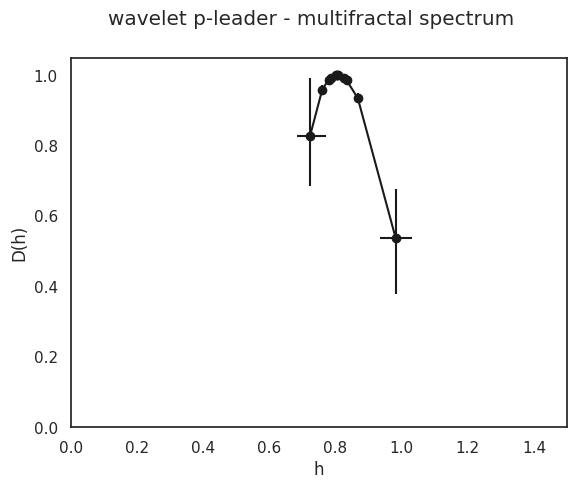

In [15]:
lwt.spectrum.plot(mfs_boot=lwt_b.spectrum)